In [1]:
import face_recognition
from pathlib import Path
from PIL import Image

In [3]:
# Load the image of the person we want to find similar people for
known_image = face_recognition.load_image_file('test_face.jpg')

# Encode the known image
known_image_encoding = face_recognition.face_encodings(known_image)[0]

In [4]:
# Variables to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

In [5]:
# Loop over all the images we want to check for similar people
for image_path in Path('people/').glob('*.png'):
    # Load an image to check
    unknown_image = face_recognition.load_image_file(image_path)
    
    # Get the locations of faces and face encoding for the current image
    face_encodings = face_recognition.face_encodings(unknown_image)
    
    # Get the face distance between the known person and all the faces in this image
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)
    
    # If this face is more similar to our known image than we've seen so far, save it
    if face_distance < best_face_distance:
        # Save the new best face distance
        best_face_distance = face_distance
        # Extract a copy of the actual face image itself so we can display it
        best_face_image = unknown_image

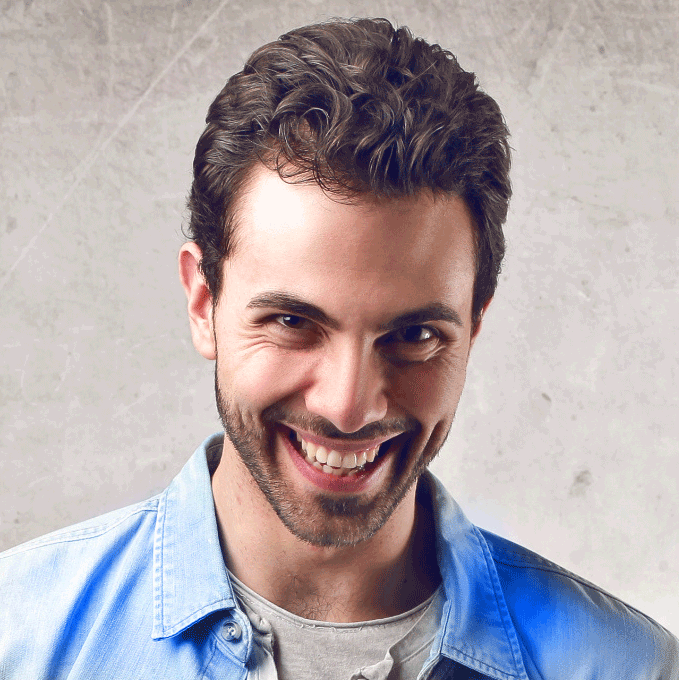

In [6]:
# Display the face image that we found to be the best match!
pil_image = Image.fromarray(best_face_image)
pil_image

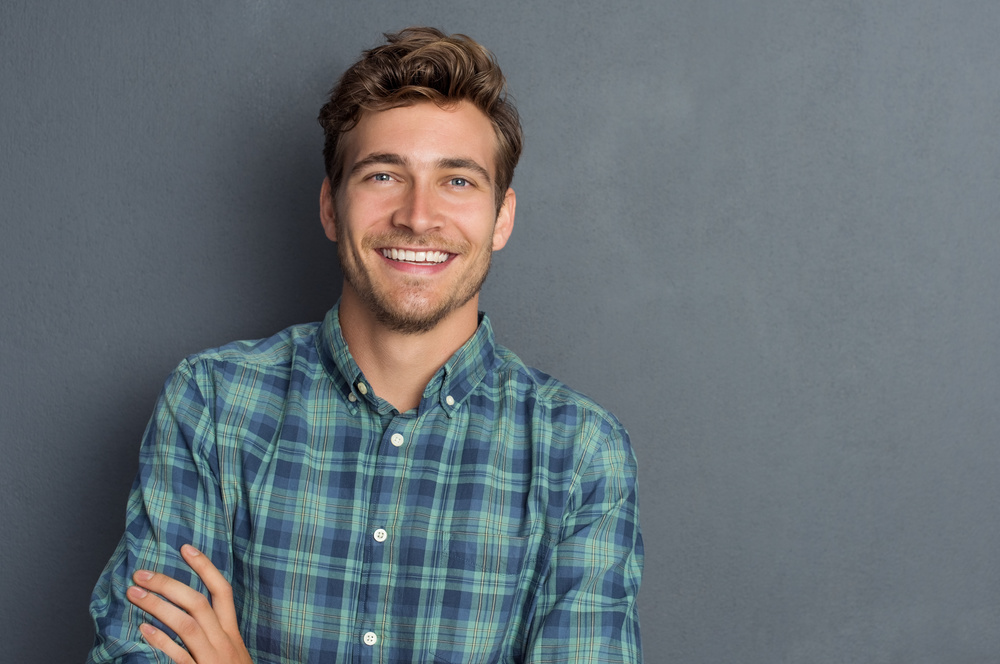

In [8]:
pil_image_known = Image.fromarray(known_image)
pil_image_known